# Project description


Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.
You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan. Since you’ve already performed the data preprocessing step, you can move straight to creating the model.
Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.

> Data description

Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:
- сalls — number of calls,
- minutes — total call duration in minutes,
- messages — number of text messages,
- mb_used — Internet traffic used in MB,
- is_ultra — plan for the current month (Ultra - 1, Smart - 0).

In [1]:
#First we need to load our packages 
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import random
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = "svg"

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error



In [2]:
#Now we need to load our dataset
Mobile_data = pd.read_csv('users_behavior.csv')
Mobile_data.info()
Mobile_data.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
2929,51.0,293.64,42.0,18679.36,1
1111,31.0,237.79,0.0,22706.37,1
2286,67.0,460.76,27.0,16626.26,0
1875,64.0,418.58,43.0,24877.83,0
1699,76.0,544.63,77.0,15785.42,0


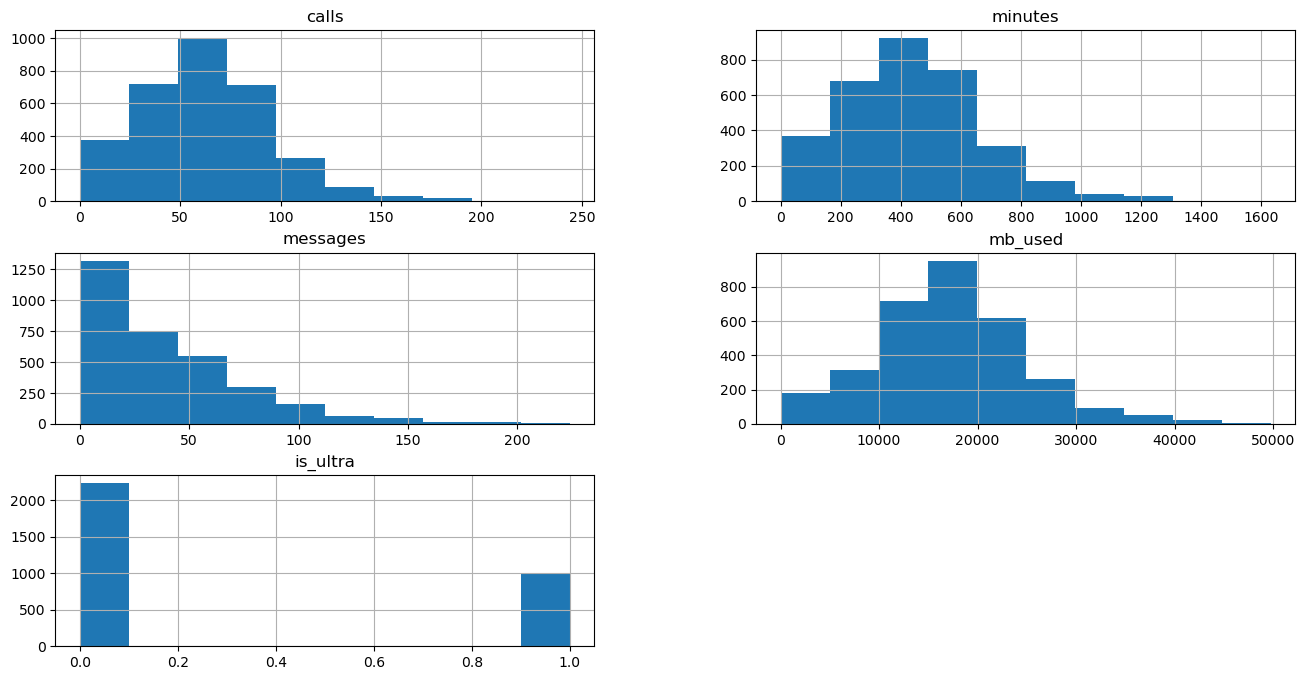

In [3]:
#Let's show our data distribution by plotting a histograms
Mobile_data.hist(figsize=(16, 8));


In [4]:
#Describing the main parameters in our data
Mobile_data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


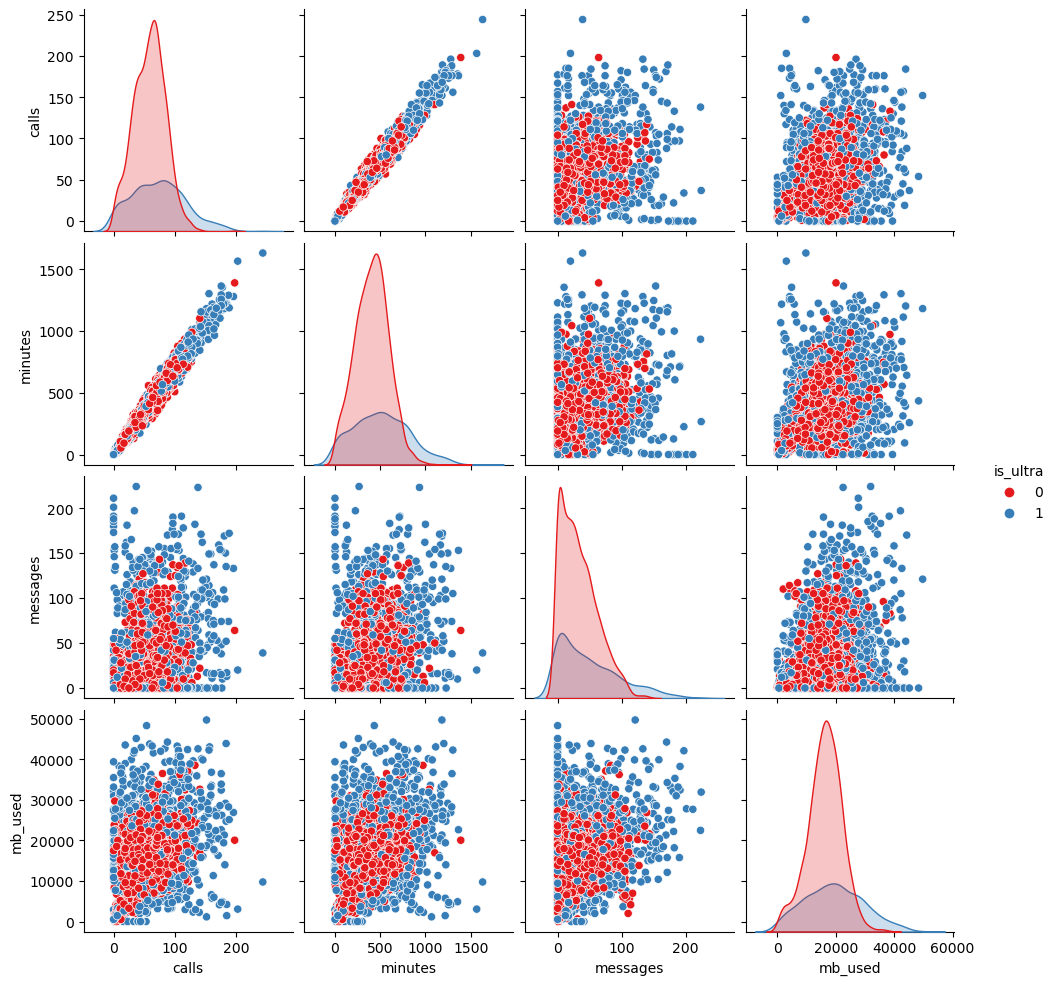

In [5]:
#How our variables depend on each other
sns.pairplot(Mobile_data, hue='is_ultra', palette='Set1');

> Like it says in the project description we have data  what we already performed in the all preprocessing step, so we can move straight to creating the model.

- In the next step, we will declare variables for features and target features for our test, train, and validation sets.
From our project task, we see that we need to predict what kind of mobile will be useful for our newest user, that is why our target is Megaline's tariff plans, and our features is all data but without the tarrife plans column. 

In [6]:
# < declare variables for features and target feature >
#Our test set

features_test = Mobile_data.drop(['is_ultra'], axis=1)
target_test = Mobile_data['is_ultra'].values.reshape(-1,1)#Reshaping values in our dataset

features_train, features_valid, target_train, target_valid = train_test_split(
   features_test, target_test, test_size=0.25, random_state=12345)
#Checking what number of data have our train and valid set
print(features_test.shape)
print(target_test.shape)
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(3214, 4)
(3214, 1)
(2410, 4)
(2410, 1)
(804, 4)
(804, 1)


> Conclusion: Now when we finished refilling our variables, we can start working with each of our models to investigate the quality of different models by changing hyperparameters. And in the end, will briefly describe the findings of the study

- First let's test $DecisionTreemodel$ here we need to find what number of depth provides our model highest accuracy. For this, we need to create a loop that will go by n-numbers of depth and calculate our accuracy depending on that number, and after that, we will show to what number of depths belong to the highest number of accuracy. We know the bigger number of leaves we have the longest our model will work that is why I propose to take only 15 leaves and check what accuracy we will have and if it's will bigger than 75% like we need from our project task, that will mean we can move on and check another model.

Accuracy of the best model: 0.7898009950248757 and best_depth: 7


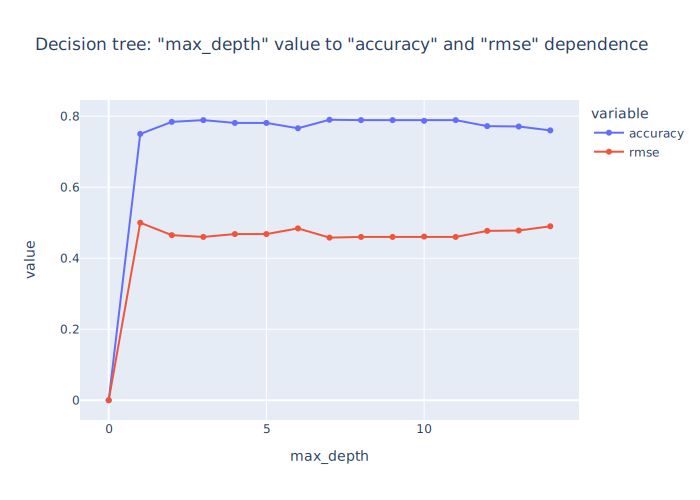

In [7]:
#Creating our loop with number of leaves(depth) from 1 to 15
best_model = None
best_result = 0
#Creating our dataset which will cointain our result values
result_df = pd.DataFrame({'max_depth': [0], 'accuracy': [0], 'rmse': [0]})
for depth in range(1, 15):   
    model_Tree = DecisionTreeClassifier(random_state=12345, max_depth=depth) # create a model with the given depth
    model_Tree.fit(features_train,target_train) # train the model
    predictions_valid = model_Tree.predict(features_valid) # get the model's predictions
    result = accuracy_score(target_valid,predictions_valid) # calculate the accuracy
    mse = mean_squared_error(target_valid, predictions_valid) ** 0.5 # calculate the mse
    result_df.loc[depth] = (depth, round(result, 3), round(mse, 3)) # put our result in the table
    if result > best_result:
        best_depth = depth
        best_result = result
        
           
print("Accuracy of the best model:", best_result,'and best_depth:',best_depth)

# Plotting our results
fig = px.line(result_df, x='max_depth', y=['accuracy', 'rmse'], markers=True,
              title='Decision tree: "max_depth" value to "accuracy" and "rmse" dependence')
fig.show()

>Conclusion: After testing our model we can say that the highest accuracy by using this method is near 79% if we will use a number of depth equal to 7. Now let's go to the next model and will test $RandomForest$ model and check what we will have there

- As we did with the previous mode we need to create a loop but not one, we need to make a nested loop where we will put variables one it's the number of trees, and the second number of leaves(depth) after passing our value to a model we will fetch the best one with the highest number of accuracy. I propose to create a range of our trees from 1 to 9, we don't wanna overfit our train model and this is common parameter of range for our model.

Accuracy of the best model on the validation set (n_estimators = 5): 0.8121890547263682, with max_depth:7


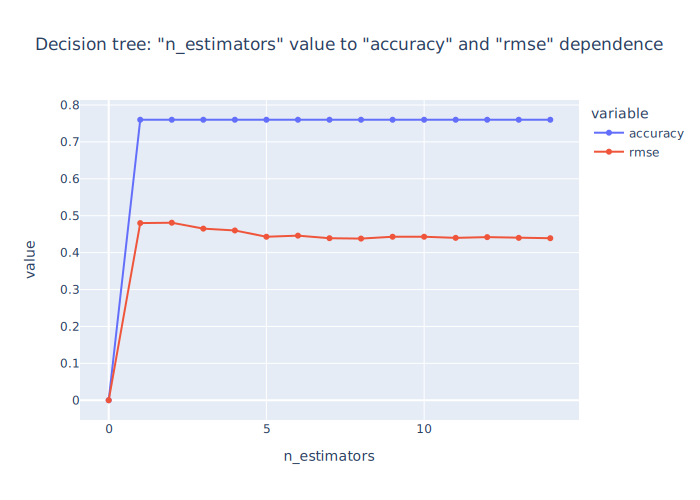

In [8]:
#Creating our loop for testing our model
best_score = 0
best_est = 0
result_df = pd.DataFrame({'n_estimators': [0], 'accuracy': [0], 'rmse': [0]})
for est in range(1, 15):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators=est,max_depth=depth) # set number of trees
        model_forest.fit(features_train,target_train)
        predictions_valid = model_forest.predict(features_valid)
        score = model_forest.score(features_valid,target_valid) # calculate accuracy score on validation set
        mse = mean_squared_error(target_valid, predictions_valid) ** 0.5
        result_df.loc[est] = (est, round(result, 3), round(mse, 3)) # put our result in the table
        if score > best_score:
            best_score = score  # save best accuracy score on validation set
            best_est = est# save number of estimators corresponding to best accuracy score
            best_depth = depth
        
print("Accuracy of the best model on the validation set (n_estimators = {}): {}, with max_depth:{}".format(best_est, best_score,best_depth))        
# Ploting our results
fig = px.line(result_df, x='n_estimators', y=['accuracy', 'rmse'], markers=True,
              title='Decision tree: "n_estimators" value to "accuracy" and "rmse" dependence')
fig.show()

> Conclusion: By using the RandomForest model we can clearly say that we have a better accuracy score than in previous models, but we need to test another one to make sure what we will have there. Next, I propose to test $LogisticRegression$ model.

In [9]:
#Creating our Model
model_log = LogisticRegression(random_state=54321, solver='liblinear') 
model_log.fit(features_train,target_train)  # train model on training set
#Here I propose to test accuracy score to our validation set and train set 
logreg_valid = model_log.score(features_train,target_train)
logreg_test = model_log.score(features_valid,target_valid)

#Printing the result

print(
    "Accuracy of the logistic regression model on the training set:",
    logreg_valid,
)
print(
    "Accuracy of the logistic regression model on the validation set:",
    logreg_test,
)

Accuracy of the logistic regression model on the training set: 0.700414937759336
Accuracy of the logistic regression model on the validation set: 0.7027363184079602


>Conlusion: By our project task we cannot accept those model because it has only  70% of accuracy, that is why let's move on to the last one and check what we will have there and we finally can make some overall conclusion.Our last model is $Support$ $vector$ $machines$

- Here we will work in another way, to find out with what hyperparameters we must work with our SVM method if we wanna achieve the best result. I propose to use the GridsearchCV method to solve our issue but for this method, i propose to take not all our dataset but will take some samples because we know that can take a lot of time to reshape and restest all our data that why we will take only 200 users for our sample and than will calculate our accuracy score

In [11]:
#Our samples
features_svc = features_train[:200]
target_svc = target_train[:200]

In [12]:
#Creating our Model
parameters = {'kernel': ('linear','rbf'), 'C':[0.1, 1, 8, 16, 32]}

svc = svm.SVC()
clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(features_svc,target_svc)
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


> Conclusion: After we created and analyzed all our models and chose the best hyperparameters for each of them we can start to work with our data, but what I propose to check our model by using  a common metric that we use to assess the quality of the model is the F1 Score, and after that, we will make a conclusion what of our model has the highest rate of accuracy

- Now we will start working with our test set in model by using the best hyperparameters what we have been found previously that provides to our model highest accuracy

In [13]:
#First, let's work with decision tree model from the previous code we know the best accuracy for our model with have with depth = 7
clf_dec = DecisionTreeClassifier(random_state=12345, max_depth=7)
clf_dec.fit(features_train,target_train)
predictions= model_Tree.predict(features_test) # get the model's predictions
print("Our accuracy score equal:{}".format(accuracy_score(target_test,predictions)))
print("Our f1_score for target values equal to:{}".format(f1_score(target_test,clf_dec.predict(features_test),average= None)))

Our accuracy score equal:0.8836341008089608
Our f1_score for target values equal to:[0.88521883 0.6489899 ]


In [14]:
#Now let's calculate for our next model Random forst with n_est = 5 and max_depth = 7
clf_forest = RandomForestClassifier(random_state=54321, n_estimators=5, max_depth=7)
clf_forest.fit(features_train,target_train)
predictions= clf_forest.predict(features_test) # get the model's predictions
print("Our accuracy score equal:{}".format(accuracy_score(target_test,predictions)))
print("Our f1_score for target values equal to:{}".format(f1_score(target_test,clf_forest.predict(features_test),average= None)))

Our accuracy score equal:0.8375855631611698
Our f1_score for target values equal to:[0.8919702  0.67293233]


In [15]:
#Let's see what f1_score we have in our Logistic regression model
model_log = LogisticRegression(random_state=54321, solver='liblinear') 
model_log.fit(features_train,target_train)
predictions = model_log.predict(features_test)
print("Our accuracy score equal:{}".format(accuracy_score(target_test,predictions)))
print("Our f1_score for target values equal to:{}".format(f1_score(target_test,model_log.predict(features_test),average= None)))

Our accuracy score equal:0.7009956440572496
Our f1_score for target values equal to:[0.82180604 0.07149758]


In [16]:
#Cheking our last model liner regression with hyperparameters C=1 and kernel = rbf
parameters = {'kernel': ('linear','rbf'), 'C':[0.1, 1, 8, 16, 32]}
svc = svm.SVC(C=1,kernel = 'rbf')
svc.fit(features_train,target_train)
predictions = svc.predict(features_test)
print("Our accuracy score equal:{}".format(accuracy_score(target_test,predictions)))
print("Our f1_score for target values equal to:{}".format(f1_score(target_test,svc.predict(features_test),average= None)))

Our accuracy score equal:0.7445550715619166
Our f1_score for target values equal to:[0.84165863 0.33950121]


>Conclusion: After we checked our models by 2 different types of scores we can conclude that the model with the highest scores of accuracy is Random forest it has an accuracy score equal to 83% and the f1_score for both our target values is for tariff plan "0" or Smart = 89% and tariff plan "1" or "Ultra" = 67%. In the end, we can say that with 83% of accuracy, we can provide our next client with the neccessary tariff plan by using that model

In [17]:
#Let's try to test our model by fetching one of our clients from the dataset and will check what tariff plan our model predicts for our user
test_data = features_test[:1]
print('Tariff plan of our user:{}'.format(clf_forest.predict(test_data)))#Our method 
print()
print(Mobile_data[:1])#Checking if all worked properly 

Tariff plan of our user:[0]

   calls  minutes  messages   mb_used  is_ultra
0   40.0    311.9      83.0  19915.42         0


Our prediction correct!!!